Image generated.


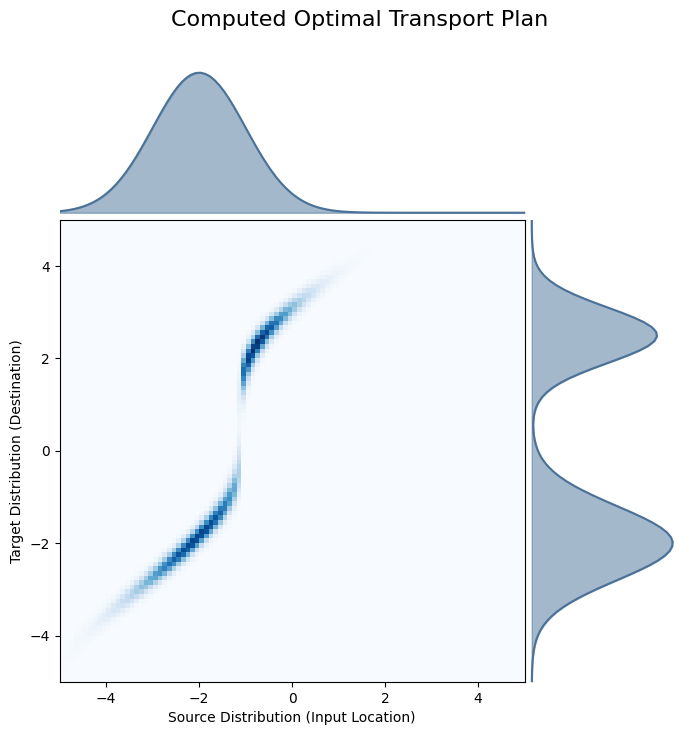

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import scipy.stats as stats

def get_distribution(x, means, stds, weights):
    """Creates a 1D distribution from a mixture of Gaussians."""
    y = np.zeros_like(x)
    for m, s, w in zip(means, stds, weights):
        y += w * stats.norm.pdf(x, m, s)
    return y / np.sum(y) # Normalize to sum to 1 (discrete probability)

def sinkhorn_knopp(a, b, M, reg, numIter=100):
    """
    Solves the Entropic Regularized Optimal Transport problem.
    a: Source distribution (1D array)
    b: Target distribution (1D array)
    M: Cost matrix
    reg: Regularization parameter (entropy)
    """
    # Kernel matrix
    K = np.exp(-M / reg)
    
    # Initialize scaling vectors
    u = np.ones(len(a)) / len(a)
    v = np.ones(len(b)) / len(b)
    
    # Sinkhorn iterations (Matrix scaling)
    for _ in range(numIter):
        u = a / (K @ v)
        v = b / (K.T @ u)
        
    # The optimal transport plan
    gamma = np.diag(u) @ K @ np.diag(v)
    return gamma

# 1. Setup Domain
N = 100 # Resolution
x = np.linspace(-5, 5, N)
y = np.linspace(-5, 5, N)
X, Y = np.meshgrid(x, y)

# 2. Define Distributions (The "Piles of Dirt")
# Source (Top): A single mound
mu = get_distribution(x, means=[-2], stds=[1.0], weights=[1])

# Target (Right): Two separate mounds (splitting the pile)
nu = get_distribution(y, means=[-2, 2.5], stds=[0.8, 0.6], weights=[0.6, 0.4])

# 3. Compute Cost Matrix (Squared Euclidean Distance)
# C_ij = (x_i - y_j)^2
M = 5*(x[:, None] - y[None, :])**2

# 4. Compute Optimal Transport Plan
reg = 0.25 # Entropic regularization (controls blurriness)
gamma = sinkhorn_knopp(mu, nu, M, reg)

# 5. Plotting (Replicating the visual style)
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(4, 4, wspace=0.0, hspace=0.0)

# Main Heatmap (Transport Plan)
ax_main = fig.add_subplot(gs[1:4, 0:3])
ax_main.imshow(gamma.T, extent=(-5, 5, -5, 5), origin='lower', cmap='Blues', aspect='auto')
ax_main.set_xlabel('Source Distribution (Input Location)')
ax_main.set_ylabel('Target Distribution (Destination)')
ax_main.grid(False)

# Top Plot (Source Distribution)
ax_top = fig.add_subplot(gs[0, 0:3], sharex=ax_main)
ax_top.fill_between(x, mu, color='#4A7298', alpha=0.5)
ax_top.plot(x, mu, color='#4A7298')
ax_top.set_axis_off()

# Right Plot (Target Distribution)
ax_right = fig.add_subplot(gs[1:4, 3], sharey=ax_main)
ax_right.fill_betweenx(y, nu, color='#4A7298', alpha=0.5)
ax_right.plot(nu, y, color='#4A7298')
ax_right.set_axis_off()

# Annotations
plt.suptitle('Computed Optimal Transport Plan', y=0.95, fontsize=16)
plt.savefig('ot_demo.png')
print("Image generated.")